## Setup & Load Cleaned Data

In [29]:
# Import Libraries
import pandas as pd
import numpy as np

# Load Cleaned Dataset
df = pd.read_csv("D:/Data Science Projects/Player Performance Prediction/data/processed/fifa_cleaned.csv")
df.head()

,Unnamed: 0,short_name,age,height_cm,weight_kg,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,defending,physic,attacking_finishing,attacking_short_passing,mentality_vision,movement_reactions,power_shot_power,overall,potential,player_positions
0,0,L. Messi,33,170,72,67500000,560000,5,4,4,...,38.0,65.0,95,91,95,94,86,93,93,"RW, ST, CF"
1,1,Cristiano Ronaldo,35,187,83,46000000,220000,5,4,5,...,35.0,77.0,95,82,82,95,94,92,92,"ST, LW"
2,3,R. Lewandowski,31,184,80,80000000,240000,4,4,4,...,43.0,82.0,94,84,79,93,89,91,91,ST
3,4,Neymar Jr,28,175,68,90000000,270000,5,5,5,...,36.0,59.0,87,87,90,91,80,91,91,"LW, CAM"
4,5,K. De Bruyne,29,181,70,87000000,370000,4,5,4,...,64.0,78.0,82,94,94,91,91,91,91,"CAM, CM"


In [30]:
df.describe()

,Unnamed: 0,age,height_cm,weight_kg,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,...,dribbling,defending,physic,attacking_finishing,attacking_short_passing,mentality_vision,movement_reactions,power_shot_power,overall,potential
count,16665.000000,16665.000000,16665.000000,16665.000000,1.666500e+04,16665.000000,16665.000000,16665.000000,16665.000000,16665.000000,...,16665.000000,16665.000000,16665.000000,16665.000000,16665.000000,16665.000000,16665.000000,16665.000000,16665.000000,16665.000000
mean,9389.283708,25.052205,180.311971,74.190819,2.321282e+06,9083.699370,1.093249,2.989799,2.530633,67.661026,...,62.433483,51.267687,64.428023,50.041284,62.589979,55.663666,61.941554,59.120252,65.774257,71.229703
std,5418.918497,4.557223,6.516187,6.709900,5.166494e+06,20161.107552,0.364262,0.645076,0.633830,10.990012,...,10.047817,16.392082,9.739206,16.227850,9.540088,12.650069,8.783615,13.335935,6.906814,6.077525
min,0.000000,16.000000,155.000000,50.000000,0.000000e+00,500.000000,1.000000,1.000000,2.000000,25.000000,...,25.000000,15.000000,28.000000,10.000000,22.000000,13.000000,30.000000,18.000000,47.000000,47.000000
25%,4703.000000,21.000000,176.000000,70.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,62.000000,...,57.000000,36.000000,58.000000,37.000000,57.000000,48.000000,56.000000,50.000000,61.000000,67.000000
50%,9369.000000,25.000000,180.000000,74.000000,6.750000e+05,3000.000000,1.000000,3.000000,2.000000,68.000000,...,64.000000,56.000000,66.000000,53.000000,63.000000,57.000000,62.000000,61.000000,66.000000,71.000000
75%,14049.000000,28.000000,185.000000,79.000000,1.900000e+06,8000.000000,1.000000,3.000000,3.000000,75.000000,...,69.000000,64.000000,72.000000,63.000000,69.000000,65.000000,68.000000,69.000000,70.000000,75.000000
max,18943.000000,53.000000,203.000000,110.000000,1.055000e+08,560000.000000,5.000000,5.000000,5.000000,96.000000,...,95.000000,91.000000,91.000000,95.000000,94.000000,95.000000,95.000000,95.000000,93.000000,95.000000


## Define Features

In [31]:
target = 'overall'

# Drop identifier and non-predictive fields
drop_cols = ['short_name', 'overall']

x = df.drop(columns=drop_cols)
y = df[target]

## Basic Feature Engineering Ideas
1. value_per_wage : Value-to-wage ratio (indicates cost-efficiency)
2. is_international_reputation : Whether international reputation is high
3. age_bucket : Age grouping
4. total_attacking : Combine multiple attacking stats
5. is_versatile : Whether a player plays multiple positions

### Create value_per_wage Feature

In [32]:
# Avoid division by zero
df['value_per_wage'] = df['value_eur']/(df['wage_eur'] + 1)
df['value_per_wage'] = df['value_per_wage'].clip(upper=df['value_per_wage'].quantile(0.95))

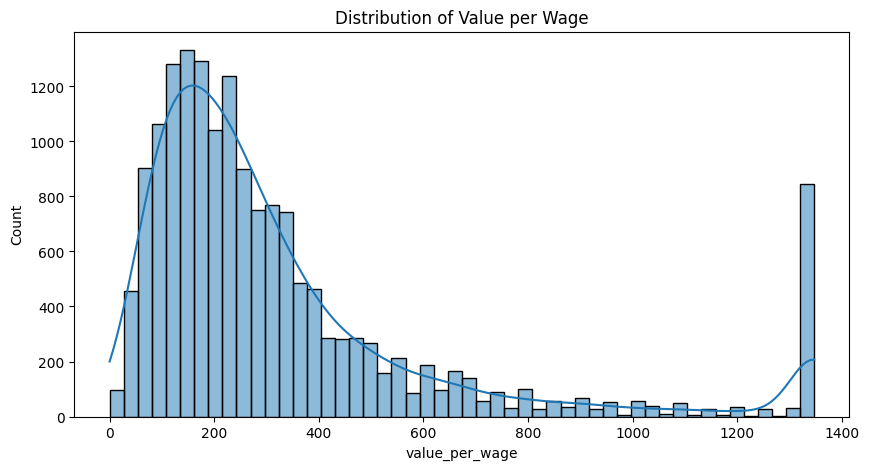

In [33]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['value_per_wage'], bins=50, kde=True)
plt.title('Distribution of Value per Wage')
plt.show()

### Create age_bucket Feature

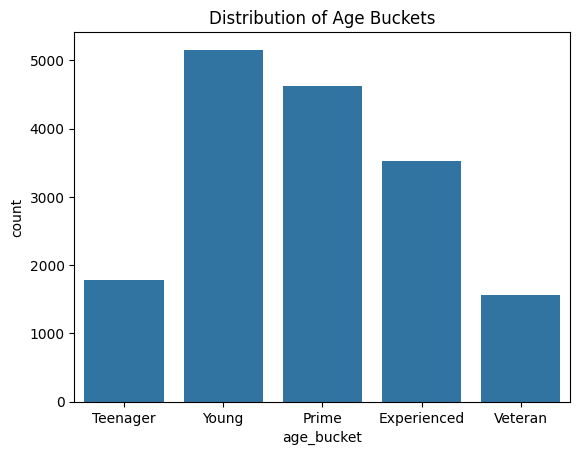

In [34]:
# Age Buckets (Groups)
bins = [15, 20, 24, 28, 32, 40]
labels = ['Teenager', 'Young', 'Prime', 'Experienced', 'Veteran']

df['age_bucket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Visualization
sns.countplot(x='age_bucket', data=df)
plt.title('Distribution of Age Buckets')
plt.show()

### Create is_international_reputation Feature

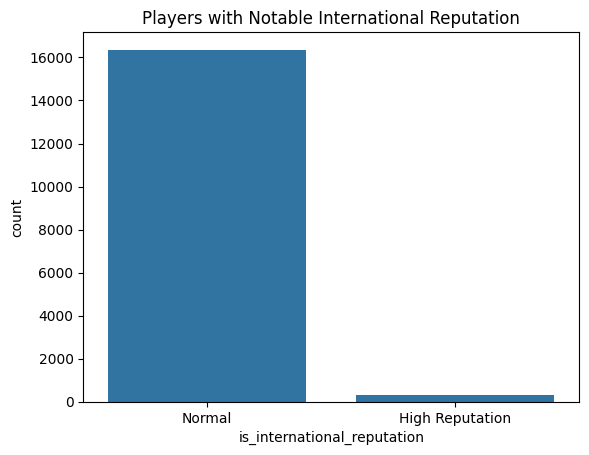

In [35]:
# Create binary column: 1 if reputation >= 3, else 0
df['is_international_reputation'] = (df['international_reputation'] >= 3).astype(int)

# Visualization
sns.countplot(x='is_international_reputation', data=df)
plt.title('Players with Notable International Reputation')
plt.xticks([0, 1], ['Normal', 'High Reputation'])
plt.show()

### Create total_attacking Feature

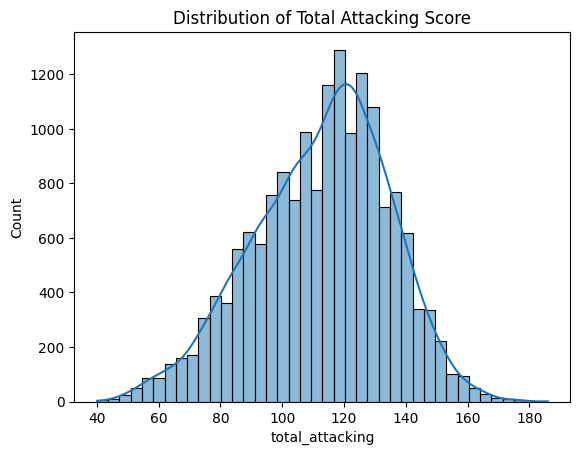

In [36]:
# We'll combine attacking features

attacking_features = [
    'attacking_short_passing',
    'attacking_finishing',
]

# Ensure, no missing value interferes
df[attacking_features] = df[attacking_features].fillna(0)

# Create Total Attacking Score
df['total_attacking'] = df[attacking_features].sum(axis=1)

# Visualization
sns.histplot(df['total_attacking'], bins=40, kde=True)
plt.title('Distribution of Total Attacking Score')
plt.show()

### Create is_versatile Feature

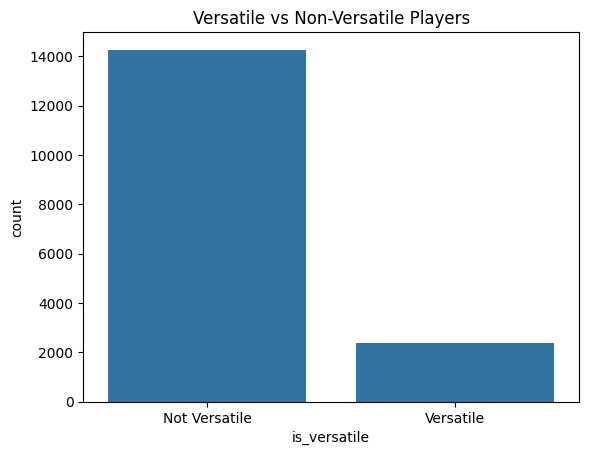

In [38]:
# Count how many positions each player can play
df['num_positions'] = df['player_positions'].apply(lambda x: len(str(x).split(',')))

# Create binary 'is_versatile' feature (1 if plays >= 3 positions)
df['is_versatile'] = (df['num_positions'] >= 3).astype(int)


# Visualization
sns.countplot(x = 'is_versatile', data = df)
plt.title('Versatile vs Non-Versatile Players')
plt.xticks([0, 1], ['Not Versatile', 'Versatile'])
plt.show()

In [43]:
df.to_csv("D:/Data Science Projects/Player Performance Prediction/data/processed/fifa_cleaned.csv", index=False)
